# Студент: Спиридонов Кирилл Анатольевич
# Группа: М8О-207М-19

# Домашняя работа №1

In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!unzip images.zip

Archive:  images.zip
   creating: images/
   creating: images/task_1/
  inflating: images/task_1/25 by 22 orthogonal maze.png  
  inflating: images/task_1/20 by 20 orthogonal maze.png  
  inflating: images/task_1/30 by 20 orthogonal maze.png  
  inflating: images/task_1/30 by 30 orthogonal maze.png  
   creating: images/task_2/
  inflating: images/task_2/image_00.jpg  
  inflating: images/task_2/image_01.jpg  
  inflating: images/task_2/image_02.jpg  


In [ ]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(3000)

1000


# Задача №1 - Лабиринт

Реализуйте алгоритм поиска выхода из лабиринта по растровому изобажению.
Вам нужно написать код, который будет находить путь (координаты пикселей) от заданного входа сверху до выхода снизу.

Отрисуйте получившийся маршрут на карте с помощью функции ```plot_maze_path(img, coords)``` или воспользуйтесь вам известным графическим инструментом.

__Input:__

Изображение лабиринта в кодировке $RGB$.

Все карты лежат на [яндекс-диске](https://yadi.sk/d/qEWVZk2picDdZw)

__Ouput:__

Массив координат пути через лабиринт в виде ```(np.array(x), np.array(y))```.

Оценивается __каждое__ успешное решение лабиринта.
Пример решенной задачи.
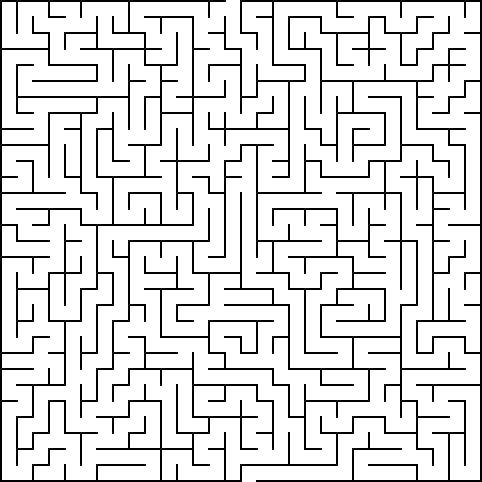

In [263]:
def plot_maze_path(image: np.ndarray, coords: tuple) -> np.ndarray:
    """
    Нарисовать путь через лабиринт на изображении.
    Вспомогательная функция.

    :param image: изображение лабиринта
    :param coords: координаты пути через лабиринт типа (x, y) где x и y - массивы координат точек
    :return img_wpath: исходное изображение с отрисованными координатами
    """
    if image.ndim != 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    img_wpath = image.copy()
    if coords:
        x, y = coords
        img_wpath[x, y, :] = [0, 0, 255]

    return img_wpath

In [277]:
class Labyrinth:
    """
    Класс Labyrinth объеденяет в себе информацию про лабиринт

    img - картинка лабиринта
    start_pos: tuple - начало лабиринта
    end_pos: tuple - конец лабиринта
    """
    def __init__(self, path_to_image, start_pos: tuple, end_pos: tuple):
        self.path_to_image = path_to_image
        self.image = cv2.imread(path_to_image)
        self.start_pos = start_pos
        self.end_pos = end_pos
        self.way_to_exit = []
        assert list(self.image[self.start_pos]) == [255, 255, 255], "start position should be white point"
        for i in range(end_pos[0], end_pos[0] + 15):
            for j in range(end_pos[1], end_pos[1] + 15):
                self.image[i][j] = [255, 0, 0]
        for i in range(start_pos[0], start_pos[0] + 15):
            for j in range(start_pos[1], start_pos[1] + 15):
                self.image[i][j] = [0, 255, 0]

    def plot_image(self) -> None:
        """
        Отобразить изображение с помощью matplotlib.
        Вспомогательная функция.

        :param image: изображение для отображения
        :return: None
        """
        fig, axs = plt.subplots(1, 1, figsize=(8, 7))

        axs.imshow(self.image)
        axs.axis('off')
        plt.plot()

    def find_way(self):
        n = 14
        used = np.zeros(self.image.shape[:2])
        def go_up(pos):
            for i in range(pos[0] - 1, pos[0] - n - 1, -1):
                if (i >= 0 and list(self.image[i][pos[1]]) != [0, 0, 0]):
                    continue
                else:
                    return False, (0, 0)
            return True, (pos[0] - n, pos[1])

        def go_down(pos):
            for i in range(pos[0] + 1, pos[0] + n + 1):
                if (i < self.image.shape[0] and list(self.image[i][pos[1]]) != [0, 0, 0]):
                    continue
                else:
                    return False, (0, 0)
            return True, (pos[0] + n, pos[1])

        def go_right(pos):
            for i in range(pos[1] + 1, pos[1] + n + 1):
                if (i < self.image.shape[1] and list(self.image[pos[0]][i]) != [0, 0, 0]):
                    continue
                else:
                    return False, (0, 0)
            return True, (pos[0], pos[1] + n)

        def go_left(pos):
            for i in range(pos[1] - 1, pos[1] - n - 1, - 1):
                if (i >= 0 and list(self.image[pos[0]][i]) != [0, 0, 0]):
                    continue
                else:
                    return False, (0, 0)
            return True, (pos[0], pos[1] - n)

        directions = [go_up, go_down, go_right, go_left]

        def rec_find_way(cur_pos, path):
            for dir in directions:
                is_path, pos = dir(cur_pos)
                if(is_path and used[pos[0]][pos[1]] == 0):
                    if (list(self.image[pos[0]][pos[1]]) == [255, 0, 0]):
                        self.way_to_exit = path.copy()
                        return True
                    used[pos[0]][pos[1]] = 1
                    path.append(pos)
                    if (rec_find_way(pos, path)):
                        return True
                    path.pop()
            return False

        rec_find_way(self.start_pos, [self.start_pos])

        fig, axs = plt.subplots(1, 1, figsize=(8, 7))


        x_coords = [point[0] for point in self.way_to_exit]
        y_coords = [point[1] for point in self.way_to_exit]

        axs.imshow(self.image)
        # axs.scatter(y_coords, x_coords, color='blue')
        plt.plot(y_coords, x_coords, 'go--', linewidth=2, markersize=2, color='orange')

    def get_coords(self):
        return self.way_to_exit

Загрузим тестовое изображение и отобразим его.

<ipython-input-277-3cc52d3d030c>:98: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(y_coords, x_coords, 'go--', linewidth=2, markersize=2, color='orange')


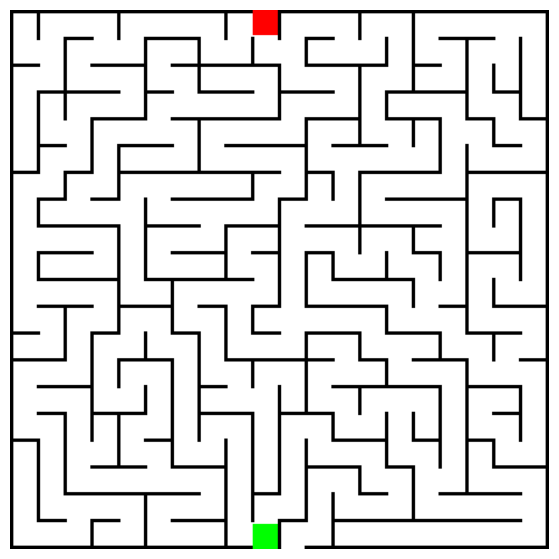

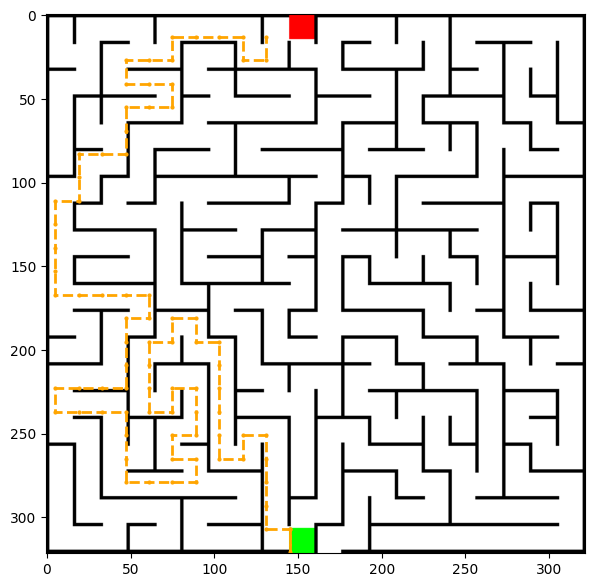

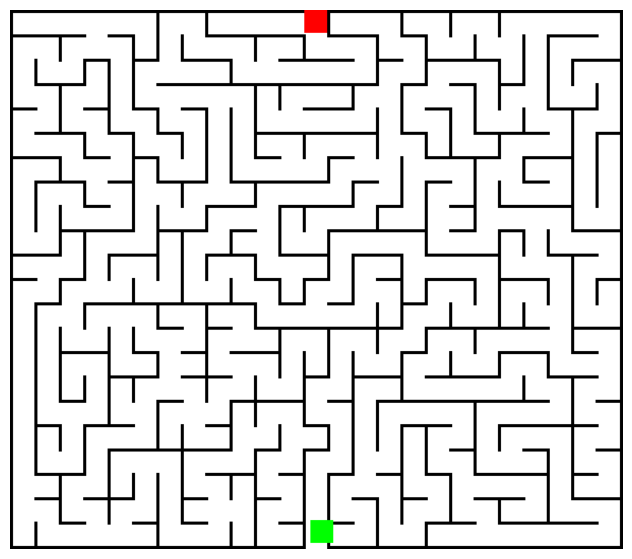

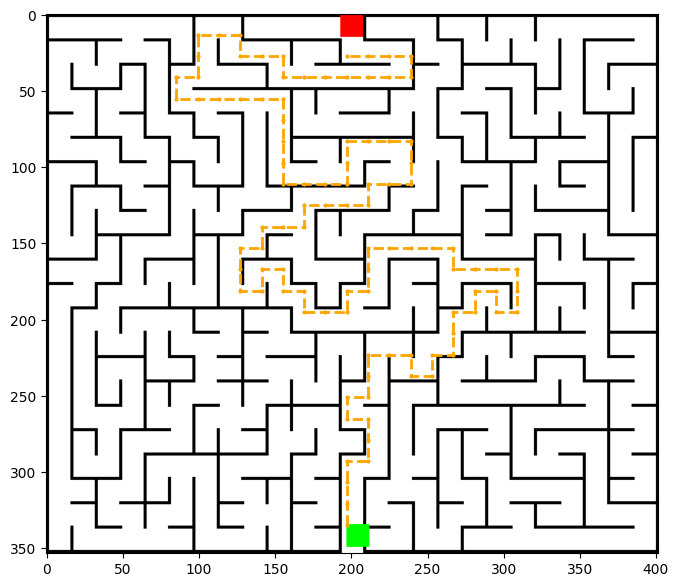

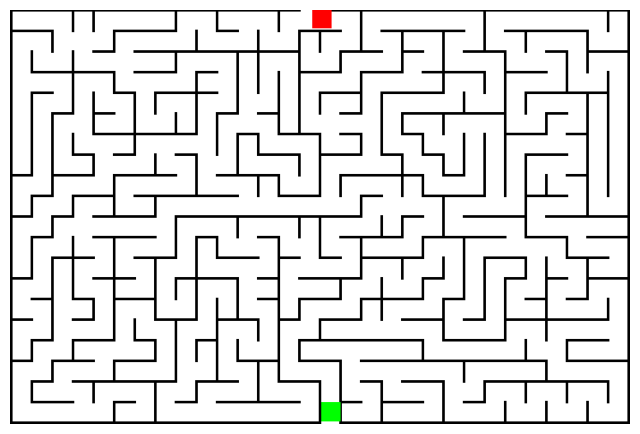

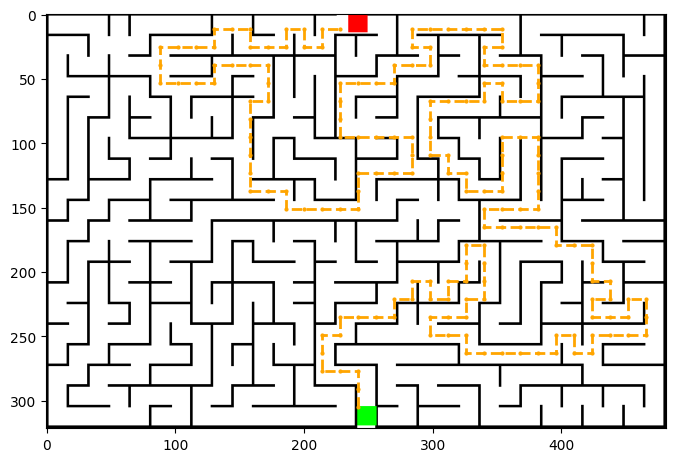

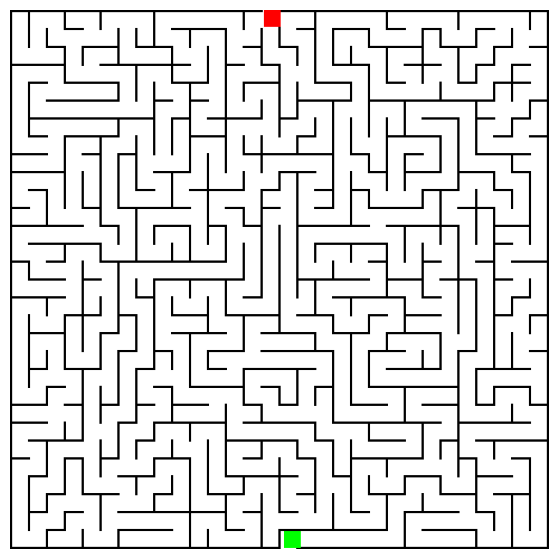

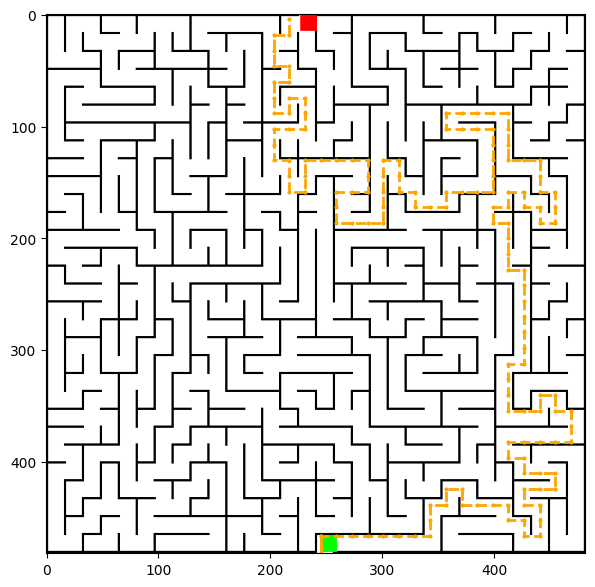

In [278]:
path_to_images = "images/task_1"
labyrinths = [
    Labyrinth(f"{path_to_images}/20 by 20 orthogonal maze.png", (307, 145), (0, 145)),
    Labyrinth(f"{path_to_images}/25 by 22 orthogonal maze.png", (335, 197), (0, 193)), # end_point = (20, 20)
    Labyrinth(f"{path_to_images}/30 by 20 orthogonal maze.png", (305, 242), (0, 235)),  # end_point = (20, 20)
    Labyrinth(f"{path_to_images}/30 by 30 orthogonal maze.png", (466, 245), (0, 227)),  # end_point = (20, 20)
]

for lab in labyrinths:
    lab.plot_image()
    lab.find_way()

In [ ]:
way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт

image_with_way = plot_maze_path(test_image, way_coords)

plot_one_image(image_with_way)

# Задача №2 - Пробки в городе

Требуется написать программу, которая на вход принимает картинку, на которой схематически изображена машинка на дороге с $N$ полосами и препятствия на полосах. Соответствующие объекты обозначены цветами, которые сохраняются на всех изображениях.

Результатом работы программы является номер полосы, на которую нужно перестроиться или сообщение о том, что перестраиваться не нужно.

**Примечание: номер дороги считается слева направо, отсчет начинается с нуля.**

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/8z84sJG/image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/Z6m4XFz/image_01.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [242]:
def get_edges(img, low, high):
    edges_area = cv2.inRange(img, low, high)
    pixels = np.argwhere(edges_area == 255)
    i = 1
    j = 0
    width_ = img.shape[1]
    res = []
    while (1):
        while (j < width_ and edges_area[i][j] == 255):
            j += 1
        l_edge = j
        while (j < width_ and edges_area[i][j] == 0):
            j += 1
        r_edge = j
        if (r_edge - l_edge >= 50):
            res.append([l_edge, r_edge])
        if (j >= width_):
            break

    return res

In [239]:
def get_car_pos(img, low, high, edges):
    car_area = cv2.inRange(img, low, high)
    car_pos = np.argwhere(car_area == 255)
    car_pos = car_pos[0][1]

    for i in range(len(edges)):
        if (edges[i][0] <= car_pos <= edges[i][1]):
            return i

In [240]:
def get_pos_without_obstacle(img, low, high, edges):
    obstacles_area = cv2.inRange(img, low, high)
    for i in range(len(edges)):
        seg = edges[i]
        obstacle = np.argwhere(obstacles_area[:, seg[0]:seg[1]] == 255)
        if (obstacle.size == 0):
            return i

In [261]:
def detect_road_change(image_path, show_imgs = True):
    """
    Определяет, нужно ли перестроиться, и если да, то на какую полосу.

    Args:
        image_path: Путь к изображению.

    Returns:
        Номер полосы, на которую нужно перестроиться, или сообщение о том,
        что перестраиваться не нужно.
    """

    img = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    #### CAR params
    car_hsv_low = (0.6 * 180, 0, 230)
    car_hsv_high = (0.8 * 180, 250, 255)

    #### EDGE params
    edge_rgb_low = (0.03 * 180, 0, 250)
    edge_rgb_high = (0.3 * 180, 250, 255)

    #### OBSTACLE
    obstacle_hsv_low = (0 * 360, 100, 200)
    obstacle_hsv_high = (0.02 * 360, 300, 255)

    edges = get_edges(img_hsv, edge_rgb_low, edge_rgb_high)
    car_pos = get_car_pos(img_hsv, car_hsv_low, car_hsv_high, edges)
    pos_without_obstacle = get_pos_without_obstacle(img_hsv, obstacle_hsv_low, obstacle_hsv_high, edges)

    if (show_imgs):
        car_area = cv2.inRange(img_hsv, car_hsv_low, car_hsv_high)
        edge_area = cv2.inRange(img_hsv, edge_rgb_low, edge_rgb_high)
        obstacles_area = cv2.inRange(img_hsv, obstacle_hsv_low, obstacle_hsv_high)
        fig, m_axs = plt.subplots(1, 4, figsize = (15, 5))
        ax1, ax2, ax3, ax4 = m_axs

        ax1.set_title('Исходная картинка', fontsize=15)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax1.imshow(img, cmap='gray')
        ax1.axis('off')

        ax2.set_title('Найденная машина', fontsize=15)
        ax2.imshow(car_area, cmap='gray')
        ax2.axis('off')

        ax3.set_title('Найденные границы', fontsize=15)
        ax3.imshow(edge_area, cmap='gray')
        ax3.axis('off')

        ax4.set_title('Найденные препятствия', fontsize=15)
        ax4.imshow(obstacles_area, cmap='gray')
        ax4.axis('off')

    result = f"Машина находится на дороге с номером: {car_pos + 1}. Номер дороги без препятсвия: {pos_without_obstacle + 1}."
    if (car_pos == pos_without_obstacle):
        result += " Перестраиваться не нужно."
    else:
        result += f" Нужно перестроиться на дорогу с номером: {pos_without_obstacle + 1}"
    return result

Машина находится на дороге с номером: 2. Номер дороги без препятсвия: 1. Нужно перестроиться на дорогу с номером: 1


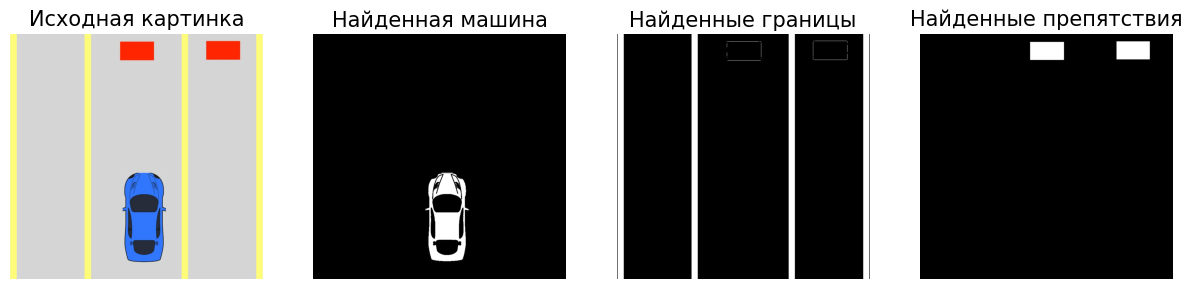

In [262]:
print(detect_road_change("images/task_2/image_02.jpg"))